Изменён гиперпараметр 'batch_size': 128 -> 64. Данный параметр отвечает за размер используемой выборки на каждом этапе. Можно сделать вывод, что в данном случае размер выборки не влияет на итоговую точность модели, однако увеличивает требуемое время для обучения.

In [12]:
from tensorflow import keras
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [13]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

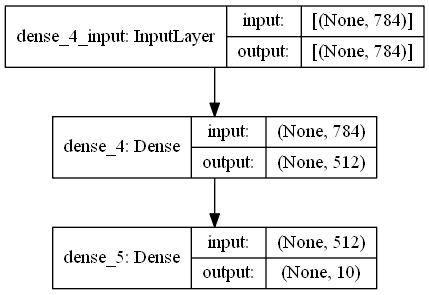

In [14]:
keras.utils.plot_model(network, show_shapes=True, show_layer_names=True)

In [15]:
# Назначение функции потерь и оптимизатора
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [16]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
history = network.fit(train_images, train_labels, epochs=5, batch_size=64, verbose=2)

Epoch 1/5
938/938 - 5s - loss: 0.2228 - accuracy: 0.9338
Epoch 2/5
938/938 - 5s - loss: 0.0917 - accuracy: 0.9725
Epoch 3/5
938/938 - 5s - loss: 0.0623 - accuracy: 0.9812
Epoch 4/5
938/938 - 5s - loss: 0.0448 - accuracy: 0.9862
Epoch 5/5
938/938 - 5s - loss: 0.0351 - accuracy: 0.9898


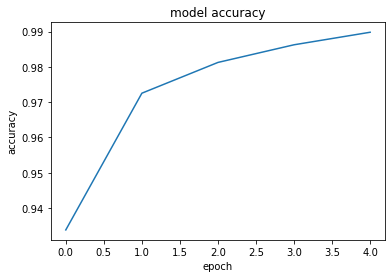

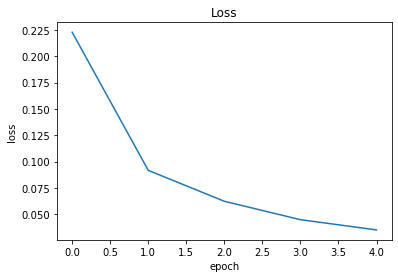

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 959us/step - loss: 0.0682 - accuracy: 0.9806
